## Requirements
#### In order to perform an analysis through this file, result tables with NumGene_CL=100 must already be included in the EvalResults folder.
#### Results tables that already exist in the folder were generated through the work of the authors.
#### Originally, those tables can be generated by running 2.x.Select_Name.py (ex, 2.3.Select_BestRCFR.py or 2.6.Select_BestRCFR_AC_W1.py).

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import statsmodels.api as sm
import seaborn as sns
from numpy import mean as npMean
import re
from Module.MetricsGroup import  DoSimEval
NumGene_CL = 100
from sklearn.preprocessing import MinMaxScaler


### Metric table load

In [2]:
ModelList = ['CFR', 'RCFR', 'RCFR_AC_W:1', 'RCFR_AC_W:2', 'RCFR_AC_W:3' ]

DIR = './EvalResults/'

MetricTableList = os.listdir(DIR)
MetricTableList = [i for i in MetricTableList if 'AggMetricRank' in i and str(NumGene_CL) in i ]

PosMetTabDic = {i.replace('AggMetricRank_', '').replace('_Filt'+str(NumGene_CL)+'.csv', '') : pd.read_csv(DIR+i) for i in MetricTableList if 'Pos' in i} 
NegMetTabDic = {i.replace('AggMetricRank_', '').replace('_Filt'+str(NumGene_CL)+'.csv', '') : pd.read_csv(DIR+i) for i in MetricTableList if 'Neg' in i} 

for i in PosMetTabDic:
    PosMetTabDic[i]['Model'] = i.replace('_Pos', '')
    
for i in NegMetTabDic:
    NegMetTabDic[i]['Model'] = i.replace('_Neg', '')


### Metric table merge

In [3]:
PosMetricTotal = pd.concat(PosMetTabDic).reset_index(drop=True)
NegMetricTotal = pd.concat(NegMetTabDic).reset_index(drop=True)

PosMetricTotal['Model'] = PosMetricTotal['Model'].replace({'_NoCL_W1':'$_{NoCL}$', '_NoSIM_W1':'$_{NoSim}$', '_NoGROM':'$_{NoGROM}$' ,'_W1':'$_{W:1}$', '_W2':'$_{W:2}$', '_W3':'$_{W:3}$', }, regex=True)
NegMetricTotal['Model'] = NegMetricTotal['Model'].replace({'_NoCL_W1':'$_{NoCL}$', '_NoSIM_W1':'$_{NoSim}$', '_NoGROM':'$_{NoGROM}$' ,'_W1':'$_{W:1}$', '_W2':'$_{W:2}$', '_W3':'$_{W:3}$', }, regex=True)


NegMetricTotal.columns = [i.replace('Neg','') for i in NegMetricTotal.columns.tolist()]
PosMetricTotal.columns = [i.replace('Pos','') for i in PosMetricTotal.columns.tolist()]

NegMetricTotal['Sign'] = 'Negative'
PosMetricTotal['Sign'] = 'Positive'
Agg_MetricTotal = pd.concat([PosMetricTotal, NegMetricTotal], axis=0)

## Performance plot for both Patient and Gene-side  

In [4]:
def PerformancebyModel (TestColName, TestLabelName, MetricTotal, ModelList, TitleList, Leg=True):
    plt.figure(figsize=(20,10))

    
    #sns.set_theme(style="darkgrid")
    
    for numi, i in enumerate(TestColName):
        plt.subplot(2,2,numi+1)
        #sns.violinplot(x='Model' ,y=i, scale="width", data=MetricTotal, cut=0,  order=ModelList)
        #sns.pointplot(x ='Model', y=i, data=MetricTotal, estimator=npMean, color='lightseagreen', order=ModelList,linestyles='-', capsize=0.1, err_style='bars',errwidth=1.5)

        if numi != 1:
            ax = sns.swarmplot(x="Model", y=i, data=MetricTotal, order=ModelList, size=5, alpha=1., linewidth=1.5, edgecolor='gray', zorder=1, hue='Sign')
            sns.pointplot(x ='Model', y=i, data=MetricTotal, estimator=npMean, order=ModelList,
                          capsize=0.1, err_style='bars',errwidth=1.5, markers='D', hue='Sign', linestyles=["-", "--"], scale=1.)
            handles, labels = ax.get_legend_handles_labels()
            ax.legend_.remove()
        else:
            ax = sns.swarmplot(x="Model", y=i, data=MetricTotal, order=ModelList, size=5, alpha=1., linewidth=1.5, edgecolor='gray', zorder=1, hue='Sign')
            sns.pointplot(x ='Model', y=i, data=MetricTotal, estimator=npMean, order=ModelList,
                          capsize=0.1, err_style='bars',errwidth=1.5, markers='D', hue='Sign', linestyles=["-", "--"], scale=1.)
            handles, labels = ax.get_legend_handles_labels()
            #ax.legend(handles[:2], labels[:2],bbox_to_anchor=(1.25, 0.65), loc=0, ncol=1,  prop={'size': 14})
            
            if Leg:
                ax.legend(handles[:2], labels[:2], prop={'size': 18})
            else:
                ax.legend_.remove()
 

        plt.xticks(fontsize=18, rotation=20)
        plt.yticks(fontsize=18, rotation=10)
        plt.xlabel('', size=20, labelpad=10)
        plt.title(TitleList[numi], size=24, pad=13)
        plt.ylabel(TestLabelName[numi], size=20 )
        #plt.ylim(bottom=-0.05)
        plt.subplots_adjust(hspace=0.6,wspace=0.15)

c:\users\user\anaconda3\envs\ai\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\user\anaconda3\envs\ai\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\user\anaconda3\envs\ai\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\user\anaconda3\envs\ai\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\user\anaconda3\envs\ai\lib\site-packages\seaborn\categorical.py:129

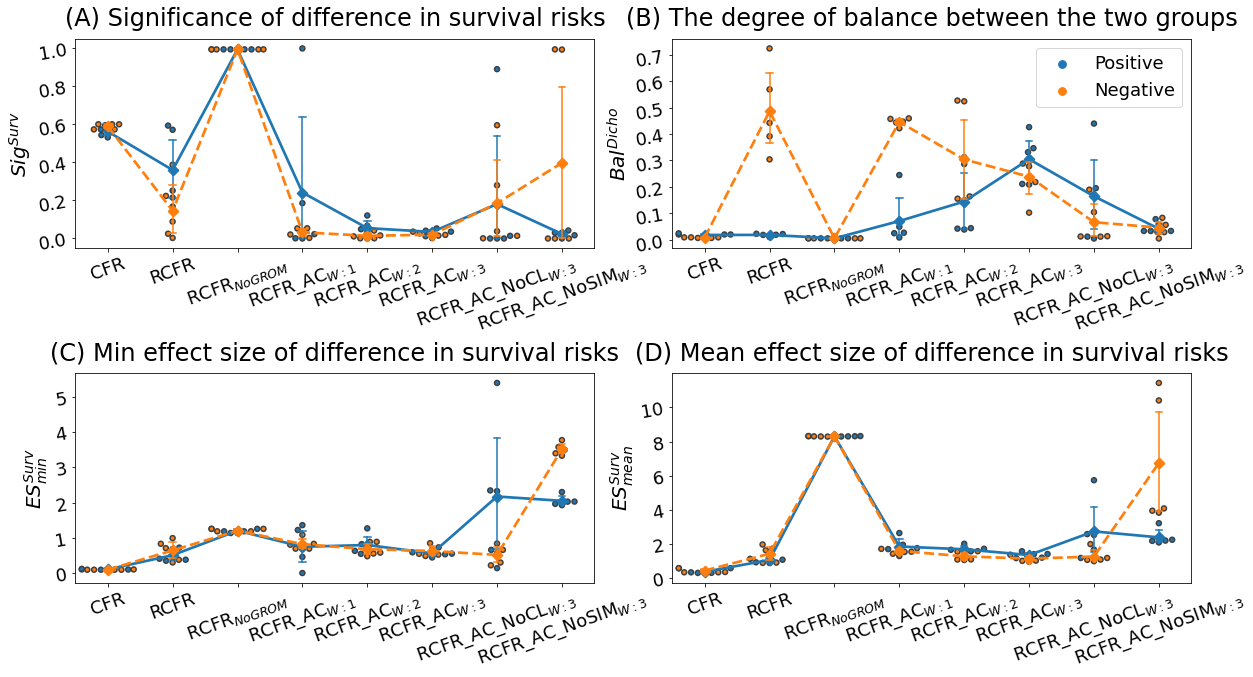

In [5]:
TestColName = ['MaxSurvpVal', 'IndCentRatio', 'MinABSSurvCoef', 'AvgABSSurvCoef']
TestLabelName = ['$Sig^{Surv}$', '$Bal^{Dicho}$', '$ES_{min}^{Surv}$', '$ES_{mean}^{Surv}$']
TitleList = ['(A) Significance of difference in survival risks',
          '(B) The degree of balance between the two groups',
          '(C) Min effect size of difference in survival risks',
          '(D) Mean effect size of difference in survival risks']

PerformancebyModel(TestColName, TestLabelName, Agg_MetricTotal, np.unique(PosMetricTotal['Model']).tolist(), TitleList, True)
plt.savefig('./Figures/PatientSide_Performance.png')


c:\users\user\anaconda3\envs\ai\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\user\anaconda3\envs\ai\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\user\anaconda3\envs\ai\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


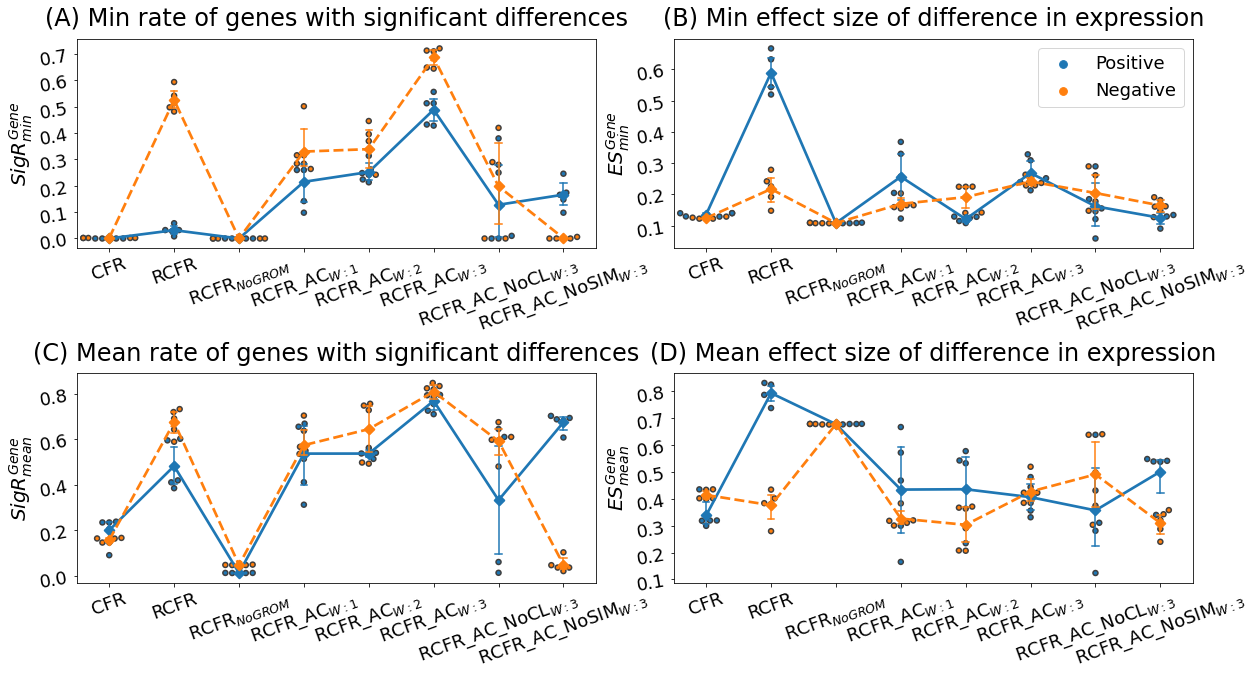

In [6]:
TestColName = ['MinSigRate', 'MinABSGeCohD','AvgSigRate', 'AvgABSGeCohD' ]
TestLabelName = ['$SigR_{min}^{Gene}$', '$ES_{min}^{Gene}$', '$SigR_{mean}^{Gene}$', '$ES_{mean}^{Gene}$']
TitleList = ['(A) Min rate of genes with significant differences',
      '(B) Min effect size of difference in expression',
      '(C) Mean rate of genes with significant differences',
      '(D) Mean effect size of difference in expression']

PerformancebyModel(TestColName, TestLabelName, Agg_MetricTotal, np.unique(PosMetricTotal['Model']).tolist(), TitleList, True)
plt.savefig('./Figures/GeneSide_Performance.png')


## Performance table

In [7]:
Cols = ['MaxSurvpVal', 'IndCentRatio', 'MinABSSurvCoef', 'AvgABSSurvCoef' , 'MinSigRate', 'AvgSigRate','MinABSGeCohD', 'AvgABSGeCohD']
RateCols = ['IndCentRatio','MinSigRate', 'AvgSigRate']
PerformanceTable = Agg_MetricTotal.groupby(['Sign','Model']).mean()[Cols]
PerformanceTable[RateCols] = PerformanceTable[RateCols]*100
PerformanceTable = np.round(PerformanceTable, 3)
PerformanceTable[RateCols] = PerformanceTable[RateCols].astype('str')+ '%'

PerformanceTable['MaxSurvpVal'] = PerformanceTable['MaxSurvpVal'].astype('str')
PerformanceTable['MaxSurvpVal'] = PerformanceTable['MaxSurvpVal'].replace({'0.0':'p<0.001'})
PerformanceTable.to_csv('./EvalResults/PerformanceTable.csv')

### Best model selection 

In [8]:
pCut= 0.01
BalCut = 0.4

DIR = './EvalResults/'
IdxList = ['Model','GroupM','EpNum']

MetricTableList = os.listdir(DIR)
MetricTableList = [i for i in MetricTableList if 'RCFR_AC_MetricTable' in i and str(NumGene_CL) in i]

MetricTables = pd.DataFrame()

for i in MetricTableList:
    MetricTables = MetricTables.append(pd.read_csv(DIR+i))
MetricTables = MetricTables[(MetricTables['MaxSurvpVal'] < pCut) &  (MetricTables['IndCentRatio'] > BalCut )]

PosMetricTotal = MetricTables[IdxList + ['IndCentRatio','MinABSSurvCoef','AvgABSSurvCoef','MinPosSigRate','AvgPosSigRate','MinABSGeCohD','AvgABSGeCohD','MaxSurvpVal']]
NegMetricTotal = MetricTables[IdxList + ['IndCentRatio','MinABSSurvCoef','AvgABSSurvCoef','MinNegSigRate','AvgNegSigRate','MinABSGeCohD','AvgABSGeCohD','MaxSurvpVal']]

PosMetricTotal['OppMaxSurvpVal'] = 1-PosMetricTotal['MaxSurvpVal']
NegMetricTotal['OppMaxSurvpVal'] = 1-NegMetricTotal['MaxSurvpVal']


PosMetricNorm = PosMetricTotal[['IndCentRatio','MinABSSurvCoef','AvgABSSurvCoef','MinPosSigRate','AvgPosSigRate','MinABSGeCohD','AvgABSGeCohD','OppMaxSurvpVal']]
NegMetricNorm = NegMetricTotal[['IndCentRatio','MinABSSurvCoef','AvgABSSurvCoef','MinNegSigRate','AvgNegSigRate','MinABSGeCohD','AvgABSGeCohD','OppMaxSurvpVal']]

# Pos res
scaler = MinMaxScaler()
scaler.fit(PosMetricNorm)
NormRes = scaler.transform(PosMetricNorm)
PosMetricTotal['Metrics'] = np.mean(NormRes, axis=1)
PosMetricTotal = PosMetricTotal.sort_values('Metrics', ascending=False).copy()
PosBestModel = PosMetricTotal.iloc[0]

# Neg res
scaler.fit(NegMetricNorm)
NormRes = scaler.transform(NegMetricNorm)
NegMetricTotal['Metrics'] = np.mean(NormRes, axis=1)
NegMetricTotal = NegMetricTotal.sort_values('Metrics', ascending=False).copy()
NegBestModel = NegMetricTotal.iloc[0]

np.save('./ModelResults/NegBestModel_name.npy', NegBestModel.Model)
np.save('./ModelResults/PosBestModel_name.npy', PosBestModel.Model)
PosBestModel, NegBestModel

<ipython-input-8-a75cac2bbd31>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PosMetricTotal['OppMaxSurvpVal'] = 1-PosMetricTotal['MaxSurvpVal']
<ipython-input-8-a75cac2bbd31>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NegMetricTotal['OppMaxSurvpVal'] = 1-NegMetricTotal['MaxSurvpVal']
<ipython-input-8-a75cac2bbd31>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

(Model             M08_RCFR_AC_W3_S5_Epo68.hdf5
 GroupM                                       5
 EpNum                                       68
 IndCentRatio                          0.422222
 MinABSSurvCoef                         1.48135
 AvgABSSurvCoef                         2.30745
 MinPosSigRate                         0.253333
 AvgPosSigRate                         0.489167
 MinABSGeCohD                          0.116413
 AvgABSGeCohD                           0.21665
 MaxSurvpVal                                  0
 OppMaxSurvpVal                               1
 Metrics                               0.579918
 Name: 467, dtype: object,
 Model             M08_RCFR_AC_W3_S5_Epo89.hdf5
 GroupM                                       5
 EpNum                                       89
 IndCentRatio                          0.476415
 MinABSSurvCoef                        0.951768
 AvgABSSurvCoef                         1.47814
 MinNegSigRate                              0.5
 AvgNegSigRat

### Performance difference by sign over epochs

In [9]:
DIR = './EvalResults/'
MetricTableList = os.listdir(DIR)
MetricTableList = [i for i in MetricTableList if 'MetricTable' in i and str(NumGene_CL) in i ]
MetTabDic = {i.replace('MetricTable_', '').replace('Filt'+str(NumGene_CL)+'.csv', '') : pd.read_csv(DIR+i) for i in MetricTableList} 


for i in MetTabDic:
    MetTabDic[i]['Model'] = i
    
MetTabDic = pd.concat(MetTabDic).reset_index(drop=True)


In [10]:
def ToLongSigRate (Data):
    
    LongMetTabDic =  pd.melt(Data, id_vars=['Model','EpNum'], value_vars=['AvgNegSigRate','AvgPosSigRate','MinNegSigRate','MinPosSigRate']).copy()
    LongMetTabDic = LongMetTabDic.rename(columns={'value':'Rate'})

    LongMetTabDic['Metric'] = 'Min'
    LongMetTabDic['Sign'] = 'Neg.'

    LongMetTabDic.loc[LongMetTabDic['variable'].str.contains('Avg'), 'Metric'] = 'Mean'
    LongMetTabDic.loc[LongMetTabDic['variable'].str.contains('Pos'), 'Sign'] = 'Pos.'
    
    return LongMetTabDic


def ToLongSurvSig (Data):
    
    LongMetTabDic =  pd.melt(Data, id_vars=['Model','EpNum'], value_vars=['MaxSurvpVal']).copy()
    LongMetTabDic['Span'] = LongMetTabDic['value'] < 0.05
    LongMetTabDic = LongMetTabDic.groupby('EpNum').mean().reset_index()
    LongMetTabDic['Span'] = LongMetTabDic['Span']==1

    
    return LongMetTabDic

ModelList = np.unique(MetTabDic['Model'])
MetTabDicSigRate = {i:ToLongSigRate(MetTabDic[MetTabDic['Model']==i]) for i in ModelList}
MetTabDicSurvSig = {i:ToLongSurvSig(MetTabDic[MetTabDic['Model']==i]) for i in ModelList}


### Visualization

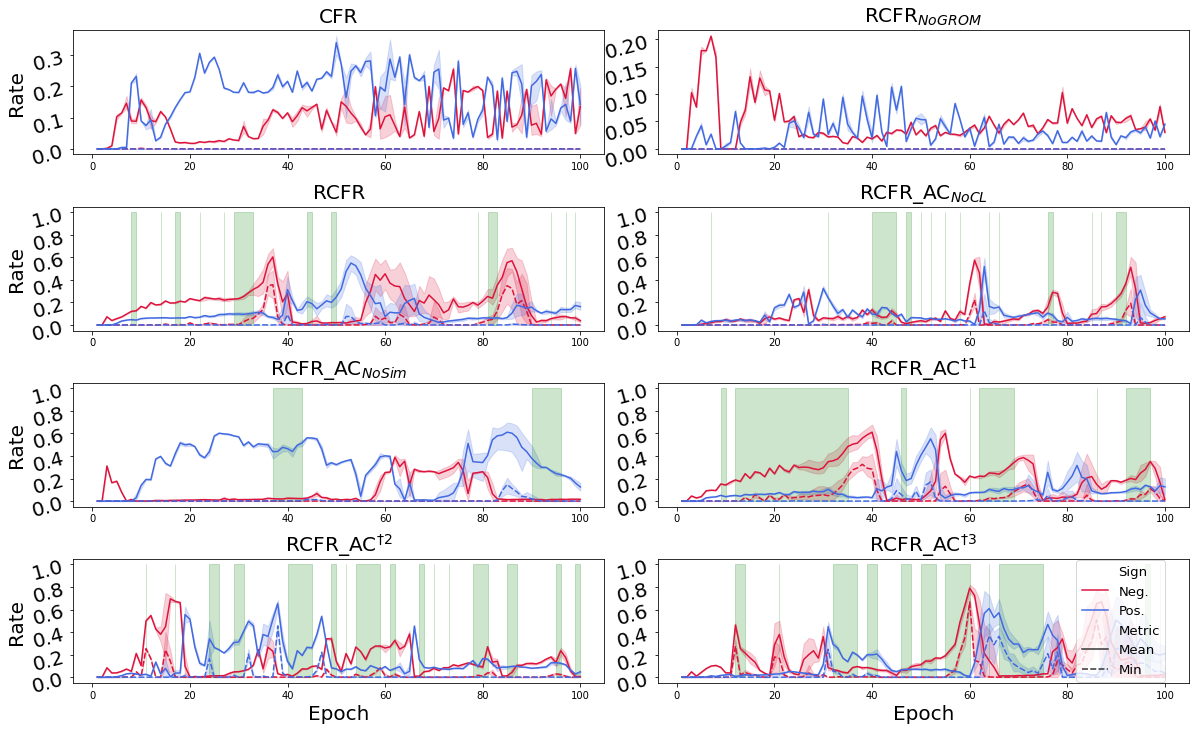

In [11]:
ModelListOrder = ['CFR_', 'RCFR_NoGROM_', 'RCFR_', 'RCFR_AC_NoCL_W3_', 'RCFR_AC_NoSIM_W3_', 'RCFR_AC_W1_', 'RCFR_AC_W2_', 'RCFR_AC_W3_',    ]
ModelListLabel = ['CFR', 'RCFR$_{NoGROM}$', 'RCFR', 'RCFR_AC$_{NoCL}$', 'RCFR_AC$_{NoSim}$', 'RCFR_AC$^{†1}$', 'RCFR_AC$^{†2}$', 'RCFR_AC$^{†3}$']


plt.figure(figsize=(20, 12))

for numi, i in enumerate(ModelListOrder):
    plt.subplot(4,2,numi+1)
    
    if numi != len(ModelListOrder)-1:
        sns.lineplot(x="EpNum", y="Rate", data=MetTabDicSigRate[i], hue='Sign', palette=['crimson','royalblue'], style='Metric', legend=False)
        plt.fill_between(MetTabDicSurvSig[i]['EpNum'], 0,1, where=MetTabDicSurvSig[i]['Span'], color='g', alpha=0.2)
    else:
        sns.lineplot(x="EpNum", y="Rate", data=MetTabDicSigRate[i], hue='Sign', palette=['crimson','royalblue'], style='Metric', legend=True)
        plt.fill_between(MetTabDicSurvSig[i]['EpNum'], 0,1, where=MetTabDicSurvSig[i]['Span'], color='g', alpha=0.2)
        plt.legend(bbox_to_anchor=(0.788, 0.99), loc=2, borderaxespad=0., prop={'size': 13.2}, ncol=1)    
        #plt.legend(bbox_to_anchor=(0.00, -0.3), loc=2, borderaxespad=0., prop={'size': 13}, ncol=2, title='')    
        #plt.legend(prop={'size': 13}, ncol=1)    
        
        
    if numi >= len(ModelListOrder)-2:
        plt.xlabel('Epoch', size=20)
    else:
        plt.xlabel('')
            
    if numi % 2 ==0:
        plt.ylabel('Rate', size=20 )
    else:
        plt.ylabel('')
    
    plt.title(ModelListLabel[numi], size=20, pad=8)
    plt.yticks(fontsize=20, rotation=15)
    
    plt.subplots_adjust(hspace=0.42,wspace=0.1)

    
plt.savefig('./Figures/SigPerformance_epoch.png')